# Question 1

In [1]:
# Step 1
import pandas as pd

In [2]:
# Step 2 , 3
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users  

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
# Step 4
mean_age_per_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_age_per_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [4]:
# Step 5
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [5]:
# Step 6
min_max_age_per_occupation = users.groupby('occupation').agg({'age': ['min','max']})
min_max_age_per_occupation

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [6]:
# Step 7
mean_age = users.groupby(['occupation','gender']).agg({'age': ['mean']})
mean_age

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [9]:
# Step 8
percentage = (users.groupby('occupation')['gender'].value_counts(normalize=True).mul(100).reset_index(name='percentage%'))
percentage

,occupation,gender,percentage%
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


# Question 2

In [56]:
# Step 1,2,3
import pandas as pd
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [57]:
# Step 4
goals = euro12[['Goals']]
goals

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [58]:
# Step 5
teams_count = euro12['Team'].count()
print("Number of teams participated in Euro 2012 : {}".format(teams_count))

Number of teams participated in Euro 2012 : 16


In [59]:
# Step 6
print("Number of columns in the dataset : {}".format(len(euro12.columns)))

Number of columns in the dataset : 35


In [60]:
# Step 7
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [61]:
# Step 8
sorted_data = discipline.sort_values(['Red Cards','Yellow Cards'])
sorted_data

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [62]:
# Step 9
avg_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
avg_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [63]:
# Step 10
goals_per_team = euro12[['Team','Goals']]
more_goals = goals_per_team[goals_per_team['Goals']  > 6]
more_goals

,Team,Goals
5,Germany,10
13,Spain,12


In [64]:
# Step 11
teams_names = euro12['Team']
filtered_teams = teams_names[teams_names.str.startswith("G")]
filtered_teams

5    Germany
6     Greece
Name: Team, dtype: object

In [68]:
# Step 12
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [69]:
# Step 13
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
# Step 14
shooting_accuracy_data = euro12[['Team','Shooting Accuracy']]
shooting_accuracy = shooting_accuracy_data.loc[shooting_accuracy_data.Team.isin(['England','Italy','Russia'])]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [28]:
# Step 1
import pandas as pd
import numpy as np

In [29]:
# Step 2
# random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

# random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

# random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [31]:
# Step 3
data = pd.concat([series1, series2, series3], axis=1)
data

,0,1,2
0,4,2,29488
1,3,2,18634
2,1,2,16088
3,1,2,27727
4,4,1,18240
...,...,...,...
95,1,2,16322
96,3,2,16136
97,2,3,14770
98,2,1,24517


In [32]:
# Step 4
data.columns=['bedrs','bathrs','price_sq_meter']
data

,bedrs,bathrs,price_sq_meter
0,4,2,29488
1,3,2,18634
2,1,2,16088
3,1,2,27727
4,4,1,18240
...,...,...,...
95,1,2,16322
96,3,2,16136
97,2,3,14770
98,2,1,24517


In [38]:
#Step 5
big_column = pd.concat([series1, series2,series3], axis=0)
bigcolumn = pd.DataFrame({"bigcolumn":big_column})
bigcolumn

,bigcolumn
0,4
1,3
2,1
3,1
4,4
...,...
95,16322
96,16136
97,14770
98,24517


### Step 6
Yes

In [39]:
# Step 7
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,bigcolumn
0,4
1,3
2,1
3,1
4,4
...,...
295,16322
296,16136
297,14770
298,24517


# Question 4

In [84]:
# Step 1
import pandas as pd
import datetime

In [85]:
# Step 2
data = pd.read_csv("C:\\Users\\Dilini\\Documents\\GeorgianCollege\\1004-Programming\\Assignments\\data\\wind.txt", sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [86]:
# Step 3
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])

In [87]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [88]:
# Step 4
def fix_year(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_year
data['Date'] = data['Date'].apply(fix_year)

In [89]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [90]:
# Step 5
data['Date'] = pd.to_datetime(data['Date'])


In [91]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [92]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [93]:
# Step 6
missing_values = data.isnull().sum()
missing_values

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [94]:
data=data.dropna()

In [95]:
data.isnull().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [96]:
# Step 7
non_missing_values = data.count()
non_missing_values

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

In [97]:
# Step 8
mean_windspeed = data.mean().mean()
print("Mean Windspeed across all Locations and Times:", mean_windspeed)

Mean Windspeed across all Locations and Times: 10.222465245951726


In [98]:
# Step 9
loc_stats = pd.DataFrame({
    'Min': data.min(),       
    'Max': data.max(),       
    'Mean': data.mean(),     
    'Std': data.std()        
})

# Display the DataFrame containing statistics for each location
print("Statistics of Windspeeds at Each Location:")
print(loc_stats)

Statistics of Windspeeds at Each Location:
      Min    Max       Mean       Std
RPT  0.67  35.80  12.359979  5.618805
VAL  0.21  33.37  10.640267  5.268695
ROS  1.50  33.84  11.656396  5.007805
KIL  0.00  28.46   6.298587  3.600942
SHA  0.13  37.54  10.448923  4.933988
BIR  0.00  26.16   7.085066  3.967735
DUB  0.00  30.37   9.793006  4.978030
CLA  0.00  31.08   8.486601  4.498299
MUL  0.00  25.88   8.490257  4.165947
CLO  0.04  28.21   8.696705  4.500488
BEL  0.13  42.38  13.110668  5.829054
MAL  0.67  42.54  15.603129  6.702178


In [100]:
# Step 10
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),      
    'Max': data.max(axis=1) ,      
    'Mean': data.mean(axis=1),    
    'Std': data.std(axis=1)        
})

# Display the DataFrame containing statistics for each day
print("Statistics of Windspeeds Across all Locations for Each Day:")
print(day_stats)

Statistics of Windspeeds Across all Locations for Each Day:
             Min    Max       Mean       Std
Date                                        
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
1961-01-06  4.42  13.21   8.240000  2.998063
1961-01-07  4.96  14.29  10.385000  3.072114
1961-01-08  5.91  16.62  10.487500  3.547237
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6546 rows x 4 columns]


In [101]:
# Step 11
january_data = data[data.index.month == 1].mean()

# Display the average windspeed in January for each location
print("Average Windspeed in January for Each Location:")
print(january_data)

Average Windspeed in January for Each Location:
RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64


In [102]:
# Step 12

yearly_freq = data.resample('Y').mean()
yearly_freq


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [103]:
# Step 13

monthly_freq = data.resample('M').mean()
monthly_freq


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [104]:
# Step 14

weekly_freq = data.resample('W').mean()
weekly_freq


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [105]:
# Step 15
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
weekly_stats

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  13.50  12.316000  1.421418   6.63  14.29  10.408000   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

In [106]:
# Step 1
import pandas as pd

In [108]:
#Step 2 , 3
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")

# Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [111]:
# Step 5
chipo.shape[0]
print("Number of observations: {}".format(chipo.shape[0]))

Number of observations: 4622


In [112]:
# Step 6
len(chipo.columns)
print("Number of columns: {}".format(len(chipo.columns)))

Number of columns: 5


In [114]:
# Step 7
chipo.columns.tolist()
print("Column Names: {}".format(chipo.columns.tolist()))

Column Names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [115]:
# Step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [118]:
# Step 9
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("The most-ordered item is: {}".format(most_ordered_item))


The most-ordered item is: Chicken Bowl


In [119]:
# Step 10
quantity_ordered = chipo.groupby('item_name')['quantity'].sum().max()
print("The quantity of the most-ordered item: {}".format(quantity_ordered))


The quantity of the most-ordered item: 761


In [121]:
# Step 11
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().idxmax()
print("The most-ordered item in the choice_description column is: {}".format(most_ordered_choice))


The most-ordered item in the choice_description column is: [Diet Coke]


In [122]:
# Step 12
total_items = chipo.quantity.sum()
print("Ordered items in total: {}".format(total_items))

Ordered items in total: 4972


In [123]:
# Step 13
change_price_type = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(change_price_type)

chipo['item_price'].dtype

dtype('float64')

In [124]:
# Step 14
revenue = (chipo['quantity']* chipo['item_price']).sum()
print("Revenue: {}".format(revenue))

Revenue: 39237.02


In [125]:
# Step 15
orders_created = chipo['order_id'].max()
print("Orders created: {}".format(orders_created))

Orders created: 1834


In [128]:
# Step 16
average_revenue_per_order = round((chipo['quantity'] * chipo['item_price']).groupby(chipo['order_id']).sum().mean(), 2)
print("Average revenue amount per order: {}".format(average_revenue_per_order))

Average revenue amount per order: 21.39


In [129]:
# Step 17
diff_items_sold = chipo.item_name.value_counts().count()
print("Number of different items sold: {}".format(diff_items_sold))

Number of different items sold: 50


# Question 6

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
us_marg_div = pd.read_csv("C:\\Users\\Dilini\\Documents\\GeorgianCollege\\1004-Programming\\Assignments\\data\\us-marriages-divorces-1867-2014.csv")
us_marg_div.sort_values('Year')

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


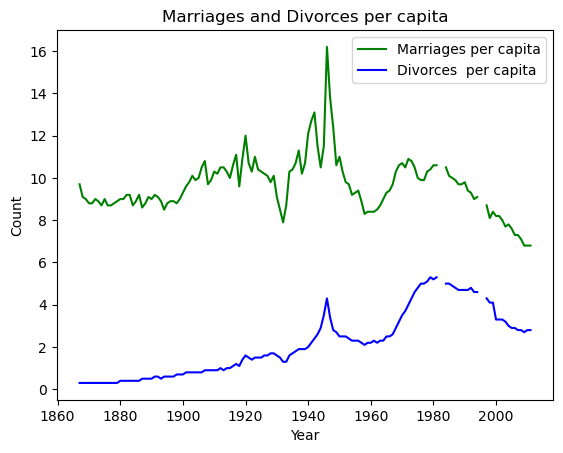

In [54]:
year = us_marg_div['Year'].tolist()
marriage = us_marg_div['Marriages_per_1000'].tolist()
divorce = us_marg_div['Divorces_per_1000'].tolist()

df = pd.DataFrame({
   'Marriages per capita': marriage,
   'Divorces  per capita': divorce
   }, index=year)

lines = df.plot.line(xlabel='Year', ylabel='Count', style=['-', '-'], color=['green', 'blue'])
plt.title('Marriages and Divorces per capita')
plt.show()

# Question 7

In [35]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
selected_years = us_marg_div[['Year','Marriages_per_1000','Divorces_per_1000']]
result = selected_years.loc[selected_years.Year.isin([1900,1950,2000])]
result

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


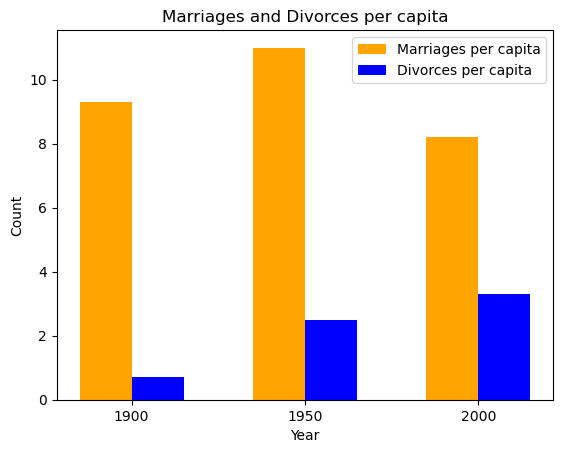

In [55]:
Year = result['Year'].astype(str).tolist()
Marriages = result['Marriages_per_1000'].tolist()
Divorces = result['Divorces_per_1000'].tolist()

bar_width = 0.3
bar_positions_marriages = range(len(Year))
bar_positions_divorces = [pos + bar_width for pos in bar_positions_marriages]

plt.bar(bar_positions_marriages, Marriages, width=bar_width, label="Marriages per capita", color='orange')
plt.bar(bar_positions_divorces, Divorces, width=bar_width, label="Divorces per capita", color='blue')

plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.title('Marriages and Divorces per capita')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_marriages], Year)  # Set x-axis ticks at the center of each group
plt.show()

# Question 8

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

actor_kill_counts = pd.read_csv("C:\\Users\\Dilini\\Documents\\GeorgianCollege\\1004-Programming\\Assignments\\data\\actor_kill_counts.csv")
sorted_kill_counts = actor_kill_counts.sort_values('Count',ascending = True)
sorted_kill_counts

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


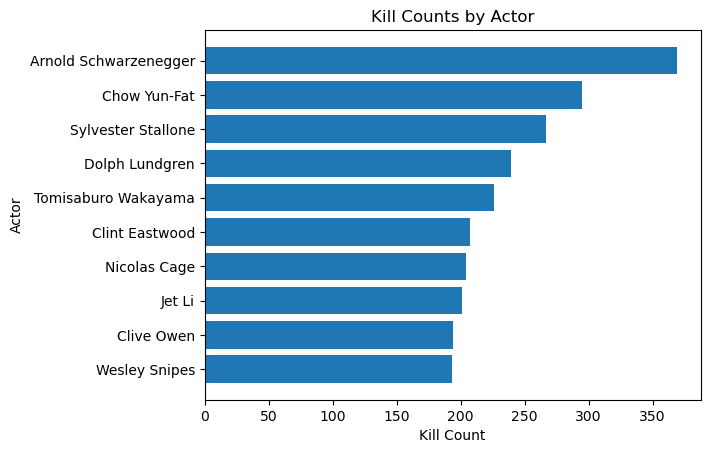

In [43]:
plt.barh(sorted_kill_counts['Actor'],sorted_kill_counts['Count'])
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Kill Counts by Actor')
plt.show()

# Question 9

In [44]:
roman_emp = pd.read_csv("C:\\Users\\Dilini\\Documents\\GeorgianCollege\\1004-Programming\\Assignments\\data\\roman-emperor-reigns.csv")
roman_emp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [18]:
cause_of_death = roman_emp['Cause_of_Death'].value_counts()
cause_of_death

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

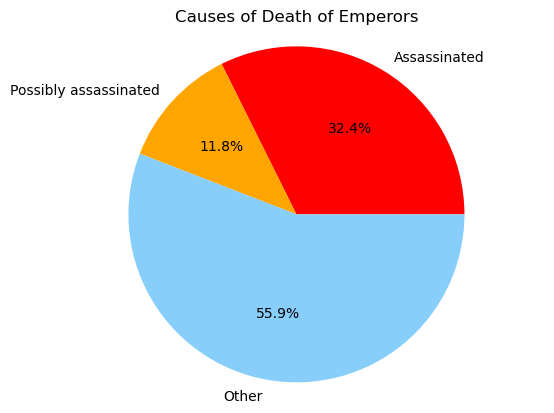

In [53]:
# Here Assassinated and Possibly assassinated is considered as seperate categories.
categories = {
    'Assassinated': cause_of_death.get('Assassinated', 0),
    'Possibly assassinated': cause_of_death.get('Possibly assassinated', 0),
    'Other': sum([v for k, v in cause_of_death.items() if k not in ['Assassinated', 'Possibly assassinated']])
}

colors = ['red', 'orange', 'lightskyblue']

# Plotting the pie chart
plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%', colors=colors)
plt.title('Causes of Death of Emperors')
plt.axis('equal')
plt.show()

# Question 10

In [47]:
arcade_revenue = pd.read_csv("C:\\Users\\Dilini\\Documents\\GeorgianCollege\\1004-Programming\\Assignments\\data\\arcade-revenue-vs-cs-doctorates.csv")
arcade_revenue

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0.5, 1.0, 'Revenue vs CS Doctorates')

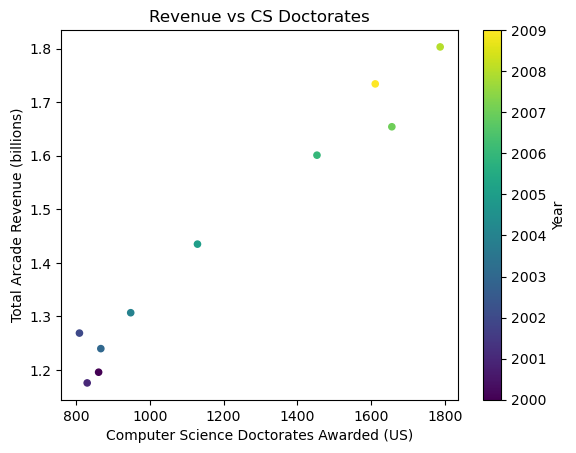

In [49]:
fig, ax = plt.subplots()
arcade_revenue.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',c = 'Year',colormap='viridis',ax=ax)
ax.set_title('Revenue vs CS Doctorates')